In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [33]:
df = pd.read_csv('DataSet11_2.csv', sep = ';', encoding='unicode_escape')
df.drop(labels=[15487], axis=0)
df = df.drop(columns=['EDUCATION'])
df = df.dropna()

df['SEX'] = df['SEX'].replace({'F': 0, 'M': 1})
df['FLAG_RESIDENCIAL_PHONE'] = df['FLAG_RESIDENCIAL_PHONE'].replace({'Y': 1, 'N': 0})
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].replace({'S': 1, 'C': 2, 'V': 3, 'D': 4})
df['RESIDENCE_TYPE'] = df['RESIDENCE_TYPE'].replace({'P': 1, 'O': 2, 'A': 3, 'C': 4})

# Получение списка столбцов с типом данных 'str' (object)
str_columns = df.select_dtypes(include=['object']).columns.tolist()
df = df.drop(columns=str_columns)
df

,ID_CLIENT,ID_SHOP,SEX,AGE,QUANT_DEPENDANTS,FLAG_RESIDENCIAL_PHONE,AREA_CODE_RESIDENCIAL_PHONE,PAYMENT_DAY,SHOP_RANK,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,MONTHS_IN_THE_JOB,PROFESSION_CODE,MATE_INCOME,QUANT_BANKING_ACCOUNTS,PERSONAL_NET_INCOME,COD_APPLICATION_BOOTH,QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION,TARGET_LABEL_BAD=1
0,2,15,0,18,0,1,31,20,0,1,216,12,853,0.0,0,300.0,0.0,0.0,0.0
1,4,12,0,47,0,0,31,25,0,1,180,24,35,0.0,0,304.0,0.0,0.0,0.0
2,5,16,0,28,0,1,31,25,0,2,12,12,24,0.0,0,250.0,0.0,0.0,0.0
3,6,24,1,26,0,0,31,28,0,1,180,0,999,0.0,0,800.0,0.0,0.0,0.0
4,7,55,0,22,0,1,31,12,0,3,0,48,999,0.0,0,410.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39993,49992,25,0,23,0,1,31,20,0,3,180,24,801,0.0,0,362.0,0.0,0.0,0.0
39994,49993,18,0,38,0,1,23,18,3,1,192,0,999,0.0,0,0.0,0.0,0.0,0.0
39996,49995,12,0,20,0,1,31,20,0,1,180,12,712,0.0,0,200.0,0.0,0.0,0.0
39997,49996,19,1,21,0,1,31,12,0,1,120,12,218,0.0,0,234.0,0.0,0.0,0.0


In [34]:
# Разделяем данные на признаки (X) и целевую переменную (y)
X = df.drop(columns=['TARGET_LABEL_BAD=1'])[1:50].to_numpy()
y = df['TARGET_LABEL_BAD=1'][1:50].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

model = SVC(kernel = 'linear', probability = True)
model.fit(X_train, y_train)
y_pred_SVM = model.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, y_pred_SVM) 
print('auc_roc', res)

auc_roc 0.1875


In [36]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_pred_kNN = model.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, y_pred_kNN) 
print('auc_roc', res)

auc_roc 0.59375


In [37]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred_NB = model.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, y_pred_NB) 
print('auc_roc', res)

auc_roc 0.8125


In [38]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred_DT = model.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, y_pred_DT) 
print('auc_roc', res)

auc_roc 0.625


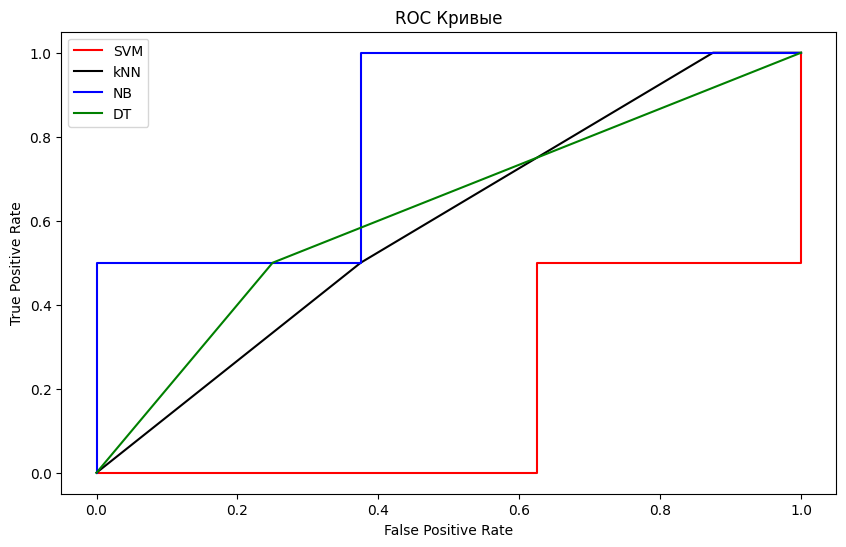

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_SVM)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_kNN)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_NB)
fpr_c4, tpr_c4, _ = roc_curve(y_test, y_pred_DT)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr_svm,tpr_svm, color='red', linestyle = 'solid', label = 'SVM')
ax.plot(fpr_knn,tpr_knn, color='black', linestyle = 'solid', label = 'kNN')
ax.plot(fpr_nb,tpr_nb, color='blue', linestyle = 'solid', label = 'NB')
ax.plot(fpr_c4,tpr_c4, color='green', linestyle = 'solid', label = 'DT')
ax.set(title="ROC Кривые", xlabel="False Positive Rate", ylabel="True Positive Rate")
ax.legend()
plt.show()

In [40]:
from sklearn.model_selection import cross_validate
import numpy as np

model = SVC(kernel = 'linear', probability = True)
cv_SVC = cross_validate(model, X_train, y_train, cv=3, return_estimator=True)
best_SVC = cv_SVC['estimator'][np.where(cv_SVC['test_score'] == max(cv_SVC['test_score']))[0][0]]
res_SVC = best_SVC.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, res_SVC)
print('auc_roc', res)

auc_roc 0.0625


In [41]:
model = KNeighborsClassifier(n_neighbors = 3)
cv_kNN = cross_validate(model, X_train, y_train, cv=3, return_estimator=True)
best_kNN = cv_kNN['estimator'][np.where(cv_kNN['test_score'] == max(cv_kNN['test_score']))[0][0]]
res_kNN = best_kNN.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, res_kNN)
print('auc_roc', res)

auc_roc 0.59375


In [42]:
model = GaussianNB()
cv_NB= cross_validate(model, X_train, y_train, cv=3, return_estimator=True)
best_NB = cv_NB['estimator'][np.where(cv_NB['test_score'] == max(cv_NB['test_score']))[0][0]]
res_NB = best_NB.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, res_NB)
print('auc_roc', res)

auc_roc 0.875


In [43]:
model = DecisionTreeClassifier()
cv_DT= cross_validate(model, X_train, y_train, cv=3, return_estimator=True)
best_DT = cv_DT['estimator'][np.where(cv_DT['test_score'] == max(cv_DT['test_score']))[0][0]]
res_DT = best_DT.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, res_DT)
print('auc_roc', res)

auc_roc 0.625


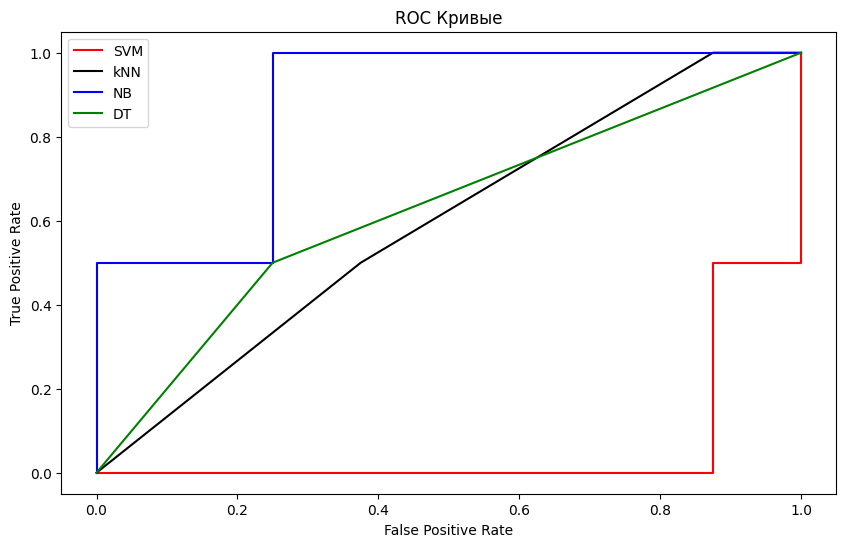

In [44]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, res_SVC)
fpr_knn, tpr_knn, _ = roc_curve(y_test, res_kNN)
fpr_nb, tpr_nb, _ = roc_curve(y_test, res_NB)
fpr_c4, tpr_c4, _ = roc_curve(y_test, res_DT)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr_svm,tpr_svm, color='red', linestyle = 'solid', label = 'SVM')
ax.plot(fpr_knn,tpr_knn, color='black', linestyle = 'solid', label = 'kNN')
ax.plot(fpr_nb,tpr_nb, color='blue', linestyle = 'solid', label = 'NB')
ax.plot(fpr_c4,tpr_c4, color='green', linestyle = 'solid', label = 'DT')
ax.set(title="ROC Кривые", xlabel="False Positive Rate", ylabel="True Positive Rate")
ax.legend()
plt.show()

In [46]:
#Композиции
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('SVC', best_SVC), ('NB', best_NB), ('DT',best_DT)], voting='hard')
eclf.fit(X_train, y_train)
res_eclf = eclf.predict(X_test)

print('auc_roc', roc_auc_score(y_test, res_eclf))

auc_roc 0.6875


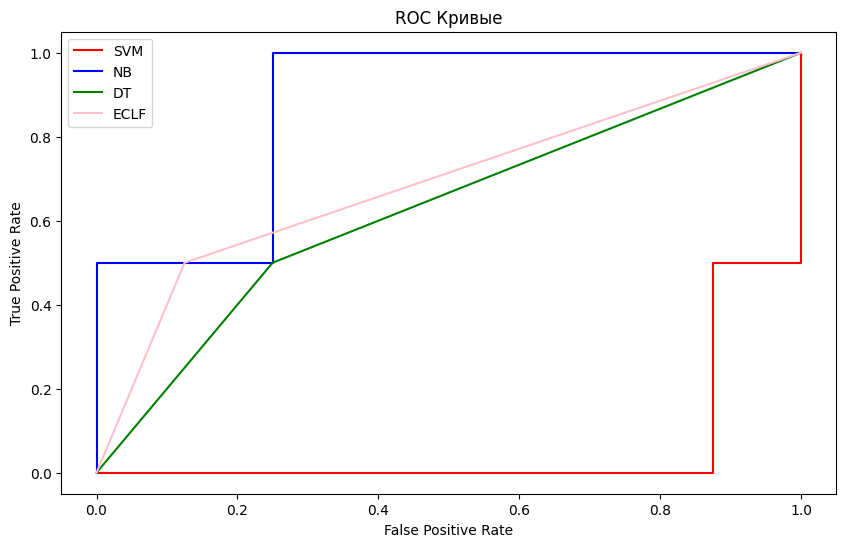

In [47]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, res_SVC)
fpr_nb, tpr_nb, _ = roc_curve(y_test, res_NB)
fpr_c4, tpr_c4, _ = roc_curve(y_test, res_DT)
fpr_eclf, tpr_eclf, _ = roc_curve(y_test, res_eclf)


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr_svm,tpr_svm, color='red', linestyle = 'solid', label = 'SVM')
ax.plot(fpr_nb,tpr_nb, color='blue', linestyle = 'solid', label = 'NB')
ax.plot(fpr_c4,tpr_c4, color='green', linestyle = 'solid', label = 'DT')
ax.plot(fpr_eclf,tpr_eclf, color='pink', linestyle = 'solid', label = 'ECLF')

ax.set(title="ROC Кривые", xlabel="False Positive Rate", ylabel="True Positive Rate")
ax.legend()
plt.show()